# **Import libraries**

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# **Basics to be added**

In [86]:
data=pd.read_csv("healthcare_dataset.csv")

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [88]:
data.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [89]:
# Split the dataset into features (X) and target (y)
X = data.drop(['Medical Condition'], axis=1)
y = data['Medical Condition']

In [90]:
# Drop the date columns if not needed
X = X.drop(columns=['Date of Admission', 'Discharge Date'])

In [91]:
print(X.columns)


Index(['Name', 'Age', 'Gender', 'Blood Type', 'Doctor', 'Hospital',
       'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type',
       'Medication', 'Test Results'],
      dtype='object')


In [92]:
categorical_columns = ['Name', 'Gender', 'Blood Type', 'Doctor', 'Hospital',
                       'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']


# Initialize the label encoders dictionary
label_encoders = {}


In [93]:
# Apply LabelEncoder to each categorical column
for column in categorical_columns:
   if column in X.columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le  # Store the encoder for future use
   else:
        print(f"Column '{column}' not found in dataset.")

In [94]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.455, random_state=42)

In [95]:
# Applying Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model 01-> logistic Regression**

In [96]:
# Initializing
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

In [97]:
# Training
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [98]:
# Testing
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [99]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log_reg) *100
precision = precision_score(y_test, y_pred_log_reg, average='weighted') *100
recall = recall_score(y_test, y_pred_log_reg, average='weighted') *100
f1 = f1_score(y_test, y_pred_log_reg, average='weighted') *100


# Print the evaluation metrics
print("Logistic Regression performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
#print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression performance:
Accuracy: 15.49
Precision: 15.60
Recall: 15.49
F1 Score: 15.34


# **Model 02-> Random forest**

In [100]:
# Initializing Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')


In [101]:
# Training the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [102]:
# Testing the model
y_pred_rf = rf_model.predict(X_test)

In [103]:
# Evaluating the model
print("Random Forest Performance:")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred_rf, average='weighted') * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred_rf, average='weighted') * 100))
print("F1 Score: {:.2f}%".format(f1_score(y_test, y_pred_rf, average='weighted') * 100))
#print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 16.42%
Precision: 16.33%
Recall: 16.42%
F1 Score: 16.27%


# **Model 03-> SVM**





In [104]:
# Initializing SVM
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)

In [105]:
# Training the model
svm_model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [106]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [107]:
# Evaluating SVM model
print("Support Vector Machine Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted') * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted') * 100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='weighted') * 100:.2f}%")

Support Vector Machine Performance:
Accuracy: 15.60%
Precision: 15.84%
Recall: 15.60%
F1 Score: 15.42%


# **Model 04-> Naive Bayes**

In [108]:
# Initializing NB
nb_model = GaussianNB()

In [111]:
#Training NB
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [112]:
y_pred_nb = nb_model.predict(X_test_scaled)

In [113]:
# Evaluate Naive Bayes
print("Naive Bayes Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='weighted') * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='weighted') * 100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_pred_nb, average='weighted') * 100:.2f}%")

Naive Bayes Performance:
Accuracy: 15.71%
Precision: 15.55%
Recall: 15.71%
F1 Score: 14.87%


# **Comparing the models together**

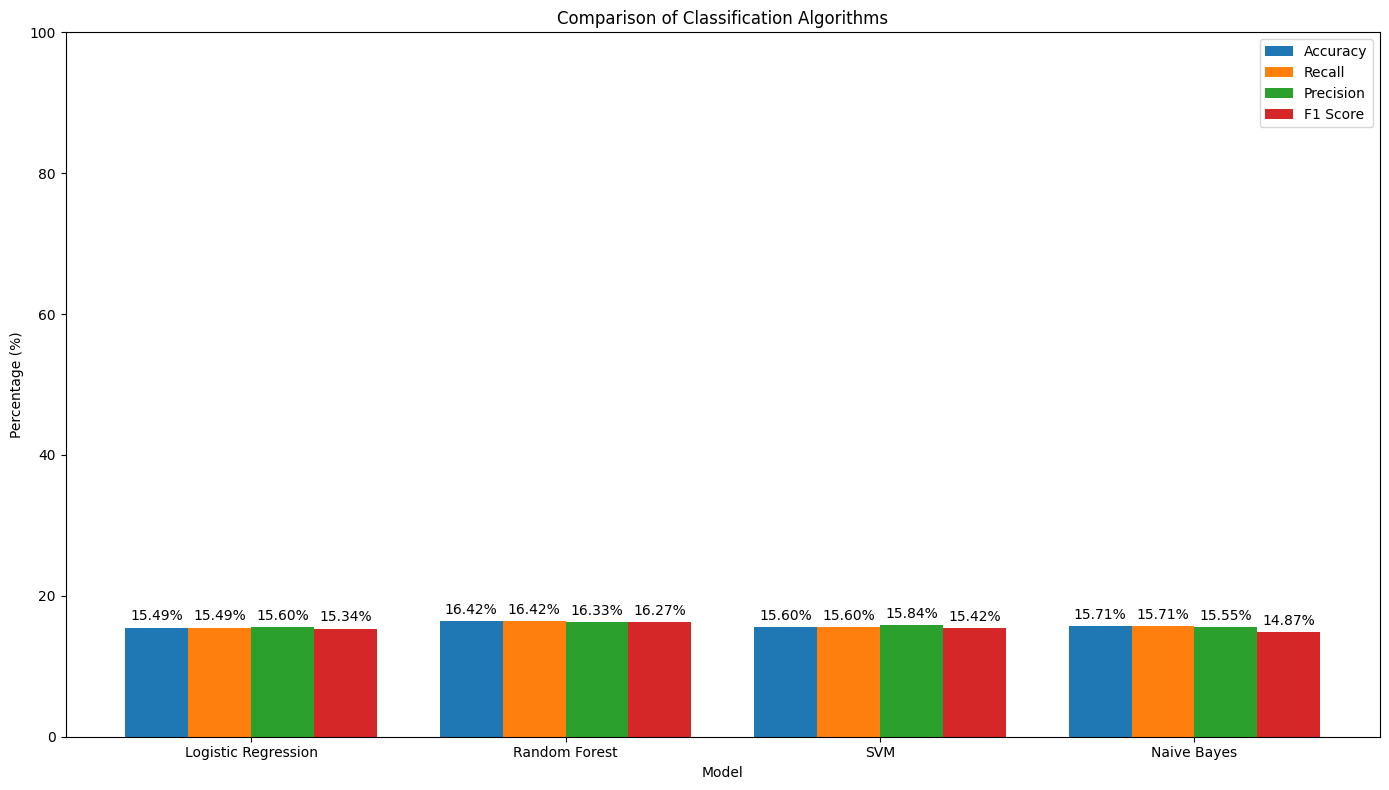

In [117]:
# Evaluate all models
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']

# Calculate metrics
metrics = {
    'Accuracy': [
        accuracy_score(y_test, y_pred_log_reg) * 100,
        accuracy_score(y_test, y_pred_rf) * 100,
        accuracy_score(y_test, y_pred_svm) * 100,
        accuracy_score(y_test, y_pred_nb) * 100
    ],
    'Precision': [
        precision_score(y_test, y_pred_log_reg, average='weighted') * 100,
        precision_score(y_test, y_pred_rf, average='weighted') * 100,
        precision_score(y_test, y_pred_svm, average='weighted') * 100,
        precision_score(y_test, y_pred_nb, average='weighted') * 100
    ],
    'Recall': [
        recall_score(y_test, y_pred_log_reg, average='weighted') * 100,
        recall_score(y_test, y_pred_rf, average='weighted') * 100,
        recall_score(y_test, y_pred_svm, average='weighted') * 100,
        recall_score(y_test, y_pred_nb, average='weighted') * 100
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log_reg, average='weighted') * 100,
        f1_score(y_test, y_pred_rf, average='weighted') * 100,
        f1_score(y_test, y_pred_svm, average='weighted') * 100,
        f1_score(y_test, y_pred_nb, average='weighted') * 100
    ]
}

# Plotting
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Create bars for each metric
rects1 = ax.bar(x - 1.5*width, metrics['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, metrics['Recall'], width, label='Recall')
rects3 = ax.bar(x + 0.5*width, metrics['Precision'], width, label='Precision')
rects4 = ax.bar(x + 1.5*width, metrics['F1 Score'], width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Classification Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Set y-axis limit
ax.set_ylim(0, 100)

# Function to add labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply the function to all bars
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

plt.tight_layout()
plt.show()